In [4]:
import os
import xml.etree.ElementTree as ET
import glob

# Define paths
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"

# List all .png images and XML reports
image_files = set([f for f in os.listdir(image_folder) if f.endswith('.png')])  # Get only .png filenames
xml_files = glob.glob(os.path.join(xml_folder, "*.xml"))  # Get all XML file paths

# Track matched and unmatched files
matched_images = set()
unmatched_images = set(image_files)
unmatched_reports = set()

# Check XML files for image references
for xml_file in xml_files:
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get all images linked to this XML file
    for img in root.findall(".//parentImage"):
        img_id = img.get("id") + ".png"  # Expected image filename
        if img_id in image_files:
            matched_images.add(img_id)
            unmatched_images.discard(img_id)
        else:
            unmatched_reports.add(xml_file)  # XML references a missing image

# Results
print(f"Total Images: {len(image_files)}")
print(f"Total XML Reports: {len(xml_files)}")
print(f"Images with Reports: {len(matched_images)}")
print(f"Images without Reports: {len(unmatched_images)}")
print(f"Reports with Missing Images: {len(unmatched_reports)}")

# Save unmatched data for manual review
with open("unmatched_images.txt", "w") as f:
    f.write("\n".join(unmatched_images))

with open("unmatched_reports.txt", "w") as f:
    f.write("\n".join(unmatched_reports))

Total Images: 7470
Total XML Reports: 3955
Images with Reports: 7470
Images without Reports: 0
Reports with Missing Images: 0


In [2]:
import os
from PIL import Image

# Define the image folder
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"  # Update this path if needed

# List all PNG images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

corrupted_images = []

# Check for corrupted images
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    try:
        with Image.open(img_path) as img:
            img.verify()  # Check if the image can be loaded
    except Exception as e:
        corrupted_images.append(img_file)
        print(f"Corrupted image detected: {img_file} - Error: {e}")

# Print results
print(f"Corrupted Images Found: {len(corrupted_images)}")
if corrupted_images:
    with open("corrupted_images.txt", "w") as f:
        f.write("\n".join(corrupted_images))
    print("List saved to corrupted_images.txt")


Corrupted Images Found: 0


In [3]:
import os
import glob
import xml.etree.ElementTree as ET

# Define the XML folder path
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"

# List all XML files in the folder
xml_files = glob.glob(os.path.join(xml_folder, "*.xml"))

def extract_text_from_xml(xml_file):
    """ Extract FINDINGS and IMPRESSION from a radiology report. """
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        findings, impression = "", ""
        for child in root.findall(".//AbstractText"):
            label = child.get("Label", "").lower()
            if "findings" in label:
                findings = child.text.strip() if child.text else ""
            elif "impression" in label:
                impression = child.text.strip() if child.text else ""

        return findings, impression

    except ET.ParseError:
        print(f"Error parsing {xml_file}")
        return "", ""

# Check all XML files
empty_reports = []

for xml_file in xml_files:
    findings, impression = extract_text_from_xml(xml_file)
    if not findings and not impression:
        empty_reports.append(xml_file)

# Print results
print(f"Reports with Missing Text: {len(empty_reports)}")
if empty_reports:
    with open("empty_reports.txt", "w") as f:
        f.write("\n".join(empty_reports))
    print("List saved to empty_reports.txt")


Reports with Missing Text: 28
List saved to empty_reports.txt


In [5]:
import os
import shutil

# Paths
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
empty_reports_file = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/empty_reports.txt"

# Backup folder for removed files
backup_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/empty_reports_removed"
os.makedirs(backup_folder + "/reports", exist_ok=True)
os.makedirs(backup_folder + "/images", exist_ok=True)

# Read the empty report filenames
with open(empty_reports_file, "r") as f:
    empty_reports = [line.strip() for line in f.readlines()]

# Remove empty reports and their corresponding images
removed_count = 0

for xml_file in empty_reports:
    xml_path = os.path.join(xml_folder, xml_file)
    base_name = os.path.splitext(xml_file)[0]  # Remove .xml extension

    # Move report file if exists
    if os.path.exists(xml_path):
        shutil.move(xml_path, os.path.join(backup_folder, "reports", os.path.basename(xml_file)))
        removed_count += 1

    # Move corresponding images
    for ext in [".png", ".jpg"]:  # Ensure all formats are covered
        image_path = os.path.join(image_folder, base_name + ext)
        if os.path.exists(image_path):
            shutil.move(image_path, os.path.join(backup_folder, "images", os.path.basename(image_path)))

print(f"✅ Successfully removed {removed_count} empty reports and their images.")


✅ Successfully removed 28 empty reports and their images.


In [12]:
import os
import xml.etree.ElementTree as ET
import glob

# Define paths
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"

# List all .png images and XML reports
image_files = set([f for f in os.listdir(image_folder) if f.endswith('.png')])  # Get only .png filenames
xml_files = glob.glob(os.path.join(xml_folder, "*.xml"))  # Get all XML file paths

# Track matched and unmatched files
matched_images = set()
unmatched_images = set(image_files)  # Start with all images as unmatched
unmatched_reports = set()

# Check XML files for image references
for xml_file in xml_files:
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get all images linked to this XML file
    for img in root.findall(".//parentImage"):
        img_id = img.get("id") + ".png"  # Expected image filename
        if img_id in image_files:
            matched_images.add(img_id)
            unmatched_images.discard(img_id)  # Remove matched images from unmatched set
        else:
            unmatched_reports.add(xml_file)  # XML references a missing image

# Results
print(f"Total Images: {len(image_files)}")
print(f"Total XML Reports: {len(xml_files)}")
print(f"Images with Reports: {len(matched_images)}")
print(f"Images without Reports: {len(unmatched_images)}")
print(f"Reports with Missing Images: {len(unmatched_reports)}")

# Save unmatched data for manual review
with open("unmatched_images.txt", "w") as f:
    f.write("\n".join(unmatched_images))  # Write unmatched images to file

with open("unmatched_reports.txt", "w") as f:
    f.write("\n".join(unmatched_reports))  # Write unmatched reports to file

Total Images: 7470
Total XML Reports: 3927
Images with Reports: 7430
Images without Reports: 40
Reports with Missing Images: 0


In [13]:
import os
import shutil

# Define paths
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
backup_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/unmatched_images_removed"
unmatched_images_file = "unmatched_images.txt"

# Create backup folder
os.makedirs(backup_folder, exist_ok=True)

# Read list of unmatched images
with open(unmatched_images_file, "r") as f:
    unmatched_images = [line.strip() for line in f.readlines()]

# Move unpaired images to the backup folder
for img in unmatched_images:
    img_path = os.path.join(image_folder, img)
    if os.path.exists(img_path):
        shutil.move(img_path, os.path.join(backup_folder, img))

print(f"✅ Successfully moved {len(unmatched_images)} unmatched images to {backup_folder}.")
print("⚠️ These images were not linked to any reports and have been removed from training data.")


✅ Successfully moved 40 unmatched images to C:/Users/2003j/Downloads/into_to_ml/chest_reports/unmatched_images_removed.
⚠️ These images were not linked to any reports and have been removed from training data.


In [14]:
import os
import xml.etree.ElementTree as ET
import glob

# Define paths
image_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_png"
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"

# List all .png images and XML reports
image_files = set([f for f in os.listdir(image_folder) if f.endswith('.png')])  # Get only .png filenames
xml_files = glob.glob(os.path.join(xml_folder, "*.xml"))  # Get all XML file paths

# Track matched and unmatched files
matched_images = set()
unmatched_images = set(image_files)  # Start with all images as unmatched
unmatched_reports = set()

# Check XML files for image references
for xml_file in xml_files:
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Get all images linked to this XML file
    for img in root.findall(".//parentImage"):
        img_id = img.get("id") + ".png"  # Expected image filename
        if img_id in image_files:
            matched_images.add(img_id)
            unmatched_images.discard(img_id)  # Remove matched images from unmatched set
        else:
            unmatched_reports.add(xml_file)  # XML references a missing image

# Results
print(f"Total Images: {len(image_files)}")
print(f"Total XML Reports: {len(xml_files)}")
print(f"Images with Reports: {len(matched_images)}")
print(f"Images without Reports: {len(unmatched_images)}")
print(f"Reports with Missing Images: {len(unmatched_reports)}")

Total Images: 7430
Total XML Reports: 3927
Images with Reports: 7430
Images without Reports: 0
Reports with Missing Images: 0


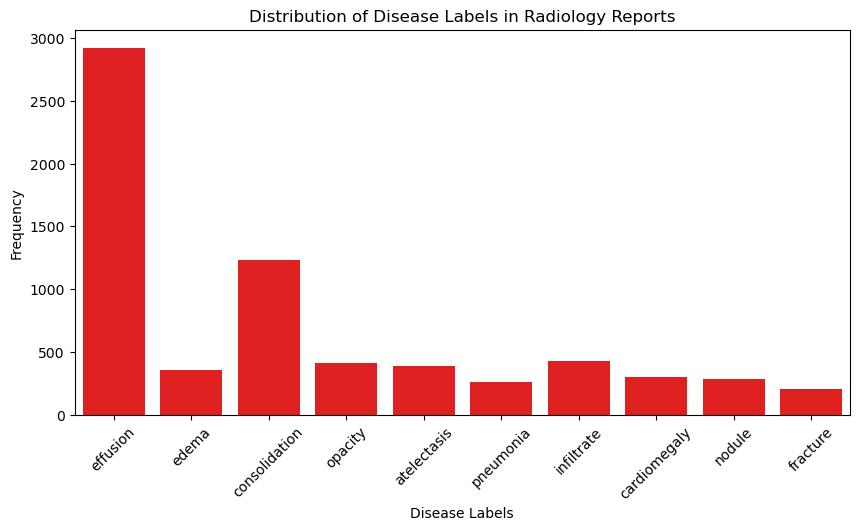

In [15]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the path to the reports folder
xml_folder = "C:/Users/2003j/Downloads/into_to_ml/chest_reports/NLMCXR_reports/ecgen-radiology"  # Update with your path

# Define common disease-related keywords
disease_keywords = [
    "pneumonia", "cardiomegaly", "effusion", "fracture", "opacity", 
    "edema", "atelectasis", "nodule", "consolidation", "infiltrate"
]

def extract_disease_labels(xml_folder):
    """Extract disease labels from radiology reports based on keyword matching."""
    disease_counts = Counter()

    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith(".xml"):
            continue  # Skip non-XML files

        xml_path = os.path.join(xml_folder, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            findings, impression = "", ""
            for child in root.findall(".//AbstractText"):
                label = child.get("Label", "").lower()
                if "findings" in label:
                    findings = child.text.strip() if child.text else ""
                elif "impression" in label:
                    impression = child.text.strip() if child.text else ""

            report_text = findings + " " + impression  # Combine text sections
            for disease in disease_keywords:
                if disease in report_text.lower():
                    disease_counts[disease] += 1  # Count occurrence

        except Exception as e:
            print(f"Error reading {xml_file}: {e}")

    return disease_counts

# Extract disease label counts
disease_counts = extract_disease_labels(xml_folder)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()), color="red")
plt.xlabel("Disease Labels")
plt.ylabel("Frequency")
plt.title("Distribution of Disease Labels in Radiology Reports")
plt.xticks(rotation=45)
plt.show()
